## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 3s 2s/step - loss: 11.4016 - accuracy: 0.3281 - val_loss: 5.2957 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 3s 1s/step - loss: 8.0053 - accuracy: 0.5000 - val_loss: 5.5926 - val_accuracy: 0.5862
Epoch 3/50
2/2 [==============================] - 3s 1s/step - loss: 4.6693 - accuracy: 0.6250 - val_loss: 6.1657 - val_accuracy: 0.5517
Epoch 4/50
2/2 [==============================] - 3s 1s/step - loss: 3.9240 - accuracy: 0.6094 - val_loss: 1.6769 - val_accuracy: 0.6207
Epoch 5/50
2/2 [==============================] - 3s 1s/step - loss: 1.7029 - accuracy: 0.7500 - val_loss: 2.9125 - val_accuracy: 0.6207
Epoch 6/50
2/2 [==============================] - 3s 1s/step - loss: 2.4608 - accuracy: 0.7344 - val_loss: 1.5558 - val_accuracy: 0.8621
Epoch 7/50
2/2 [==============================] - 3s 1s/step - loss: 0.5482 - accuracy: 0.8281 - val_

In [15]:
import matplotlib.pyplot as plt

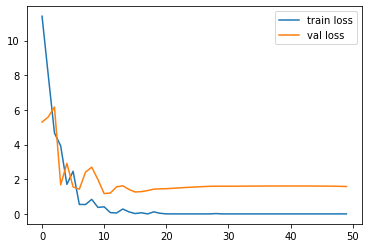

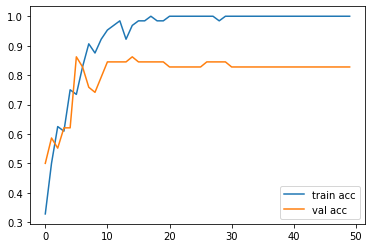

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [96]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [97]:

y_pred = model.predict(test_set)


In [98]:
y_pred

array([[8.09680894e-02, 4.23656497e-03, 9.14795280e-01],
       [4.48270440e-02, 4.96294975e-01, 4.58877891e-01],
       [1.26387239e-01, 1.28153235e-01, 7.45459497e-01],
       [1.20716160e-02, 4.55899030e-01, 5.32029331e-01],
       [4.26282078e-01, 3.29511434e-01, 2.44206488e-01],
       [7.34790741e-03, 9.27697599e-01, 6.49544224e-02],
       [9.36440676e-02, 8.86582255e-01, 1.97736844e-02],
       [9.90738198e-02, 4.99291003e-01, 4.01635259e-01],
       [1.80671066e-02, 5.24440587e-01, 4.57492292e-01],
       [4.58801463e-02, 9.08538699e-03, 9.45034504e-01],
       [1.33813871e-03, 9.64326859e-01, 3.43350805e-02],
       [8.57960343e-01, 8.19967166e-02, 6.00429513e-02],
       [4.20953147e-02, 5.17338107e-04, 9.57387388e-01],
       [6.71911221e-06, 1.95932807e-03, 9.98033941e-01],
       [1.13701902e-01, 2.89142519e-01, 5.97155511e-01],
       [3.93051542e-02, 8.00453305e-01, 1.60241604e-01],
       [2.17538606e-02, 1.99232295e-01, 7.79013813e-01],
       [3.11040523e-04, 9.90539

In [99]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [100]:
y_pred

array([2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1,
       2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2], dtype=int64)

In [101]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [153]:
model=load_model('model_resnet50.h5')

In [154]:
img_data

array([[[[-0.9986159 , -0.9986159 , -0.9986159 ],
         [-0.9990465 , -0.9990465 , -0.9990465 ],
         [-0.99901575, -0.99901575, -0.99901575],
         ...,
         [-0.99901575, -0.9993233 , -0.99907726],
         [-0.99901575, -0.9993233 , -0.99907726],
         [-0.99901575, -0.9993233 , -0.99907726]],

        [[-0.99929255, -0.99929255, -0.99929255],
         [-0.9988927 , -0.9988927 , -0.9988927 ],
         [-0.9991388 , -0.9991388 , -0.9991388 ],
         ...,
         [-0.99809307, -0.99824685, -0.9980315 ],
         [-0.99809307, -0.99824685, -0.9980315 ],
         [-0.99809307, -0.99824685, -0.9980315 ]],

        [[-0.9967089 , -0.9967089 , -0.9967089 ],
         [-0.99612457, -0.99612457, -0.99612457],
         [-0.99744713, -0.99744713, -0.99744713],
         ...,
         [-0.9972626 , -0.99729335, -0.9970473 ],
         [-0.9972626 , -0.99729335, -0.9970473 ],
         [-0.99723184, -0.9972626 , -0.99701655]],

        ...,

        [[-0.994925  , -0.99498653, -0

In [155]:
img=image.load_img('Datasets/Test/mercedes/41.jpg',target_size=(224,224))

In [156]:
x=image.img_to_array(img)
x

array([[[ 45.,  45.,  45.],
        [ 31.,  31.,  31.],
        [ 32.,  32.,  32.],
        ...,
        [ 32.,  22.,  30.],
        [ 32.,  22.,  30.],
        [ 32.,  22.,  30.]],

       [[ 23.,  23.,  23.],
        [ 36.,  36.,  36.],
        [ 28.,  28.,  28.],
        ...,
        [ 62.,  57.,  64.],
        [ 62.,  57.,  64.],
        [ 62.,  57.,  64.]],

       [[107., 107., 107.],
        [126., 126., 126.],
        [ 83.,  83.,  83.],
        ...,
        [ 89.,  88.,  96.],
        [ 89.,  88.,  96.],
        [ 90.,  89.,  97.]],

       ...,

       [[165., 163., 164.],
        [171., 169., 170.],
        [184., 182., 183.],
        ...,
        [255., 253., 255.],
        [254., 252., 255.],
        [252., 250., 253.]],

       [[179., 181., 176.],
        [163., 165., 160.],
        [157., 158., 153.],
        ...,
        [203., 203., 203.],
        [208., 208., 208.],
        [216., 216., 216.]],

       [[171., 173., 168.],
        [169., 171., 166.],
        [164., 1

In [157]:
x.shape

(224, 224, 3)

In [158]:
x=x/255

In [159]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [160]:
model.predict(img_data)

array([[0.01119301, 0.6542913 , 0.33451566]], dtype=float32)

In [161]:
a=np.argmax(model.predict(img_data), axis=1)

In [162]:
a==1

array([ True])

In [163]:
import tensorflow as tf

In [164]:
tf.__version__

'2.3.1'